In [5]:
import meep as mp
import numpy as np
from datetime import date
import pickle,json
import MyMeepFunctions as myF
import matplotlib.pyplot as plt 



Gap = 6.434e-01


fsrc = 1/1.5475 # frequency of eigenmode or constant-amplitude source
df = 16e-3


nfreq = 100
resolution = 10 #pixels per distance unit, so 10 px/um rn. (ideal)


#flux_freqs = mp.get_flux_freqs(src)

sim,src,tran,sphereMode = myF.buildWGMmodel(40,1/2,Gap,fsrc,df,resolution,nfreq)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000241995 s
Working in 2D dimensions.
Computational cell is 100 x 100 x 0 with resolution 10
     block, center = (0,-41.1434,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,0,0)
          radius 40, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
time for set_epsilon = 2.21312 s
-----------
MPB solved for frequency_1(0.4,0,0) = 0.325945 after 18 iters
MPB solved for frequency_1(0.852326,0,0) = 0.636752 after 8 iters
MPB solved for frequency_1(0.866226,0,0) = 0.646203 after 13 iters
MPB solved for frequency_1(0.866227,0,0) = 0.646204 after 1 iters


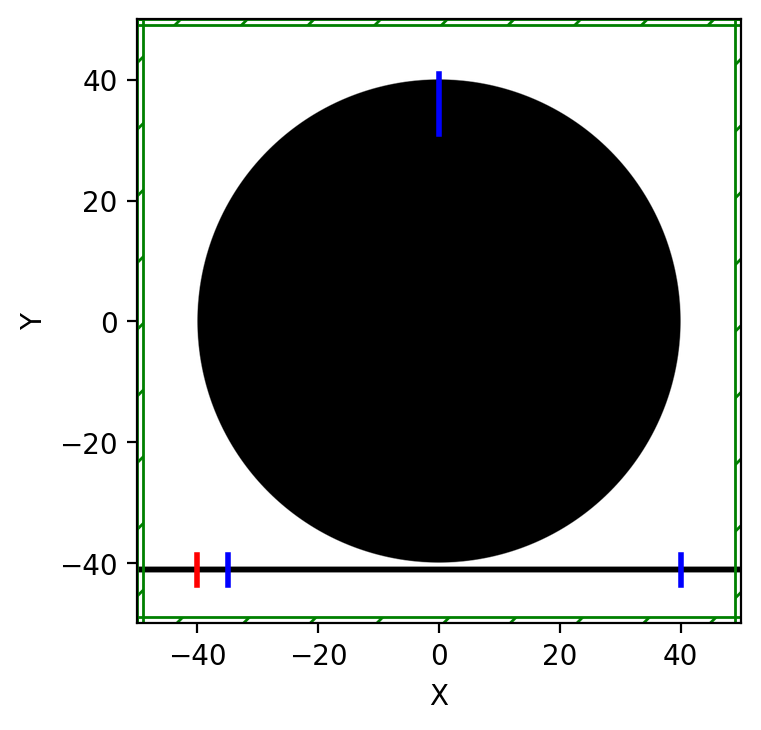

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=200)
sim.plot2D(plot_sources_flag=True,plot_monitors_flag=True)
plt.show()

In [22]:
0.635*5

3.175

In [24]:
t = (1e-6/3e8)
tFactor = 1e-15/t # converts femptoseconds into unitless MEEP 

Simtime = 3.5e6 #in femptoseconds

noDP = 100

print(Simtime*tFactor)
print(Simtime*tFactor/noDP)

1050000.0000000002
10500.000000000002


In [28]:
t = (1e-6/3e8)
tFactor = 1e-15/t # converts femptoseconds into unitless MEEP 

Simtime = 1000 #in femptoseconds

sim.use_output_directory('test/potato')

#sim.reset_meep()
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.at_every(100, mp.output_efield),
        until=(Simtime*tFactor))

Meep: using output directory 'test/potato'


FloatProgress(value=1100.449951171875, description='0% done ', max=1400.449951171875, min=1100.449951171875)

creating output file "test/potato/eps-001100.45.h5"...
creating output file "test/potato/e-001100.45.h5"...
on time step 22009 (time=1100.45), 0.015571 s/step
on time step 22766 (time=1138.3), 0.00529044 s/step


KeyboardInterrupt: 

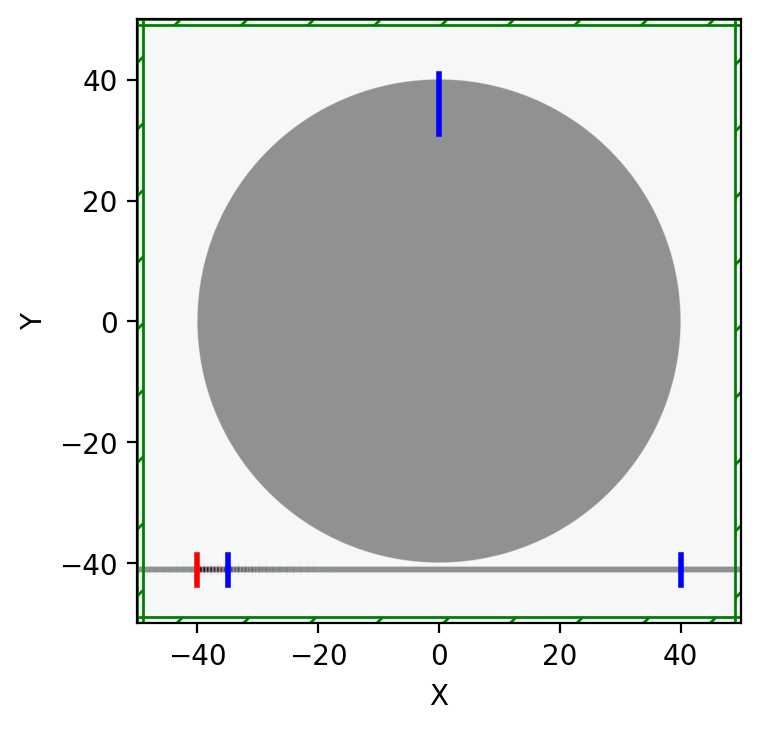

In [4]:
plt.figure(dpi=200)
sim.plot2D(fields=mp.Ez,plot_sources_flag=True,plot_monitors_flag=True)
plt.show()